# Simulation of noisy mutual inhibition
*Nhat Le, October 2017*

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
plt.plot(b)

In [ ]:
a = np.linspace(-10, 10, 100)
b = thresh_exp(a)

In [ ]:
def thresh_tanh(activity):
    '''Activation function for a neuron'''
    return 1 + np.tanh(activity)



def update_u_tanh(u, v, c1, dt):
    activation = u - (c1 * v) * dt
    #print(activation)
    return thresh_tanh(activation)

def update_v_tanh(u, v, c2, dt):
    activation = v - (c2 * u) * dt
    return thresh_tanh(activation)

def simulate_u_v_tanh(u_init, v_init, c1, c2, dt, niter):
    u_lst = []
    v_lst = []
    u = u_init
    v = v_init
    for i in range(niter):
        u = update_u_tanh(u, v, c1, dt)
        u_lst.append(u)
        v = update_v_tanh(u, v, c2, dt)
        v_lst.append(v)
    return u_lst, v_lst

In [ ]:
u1, v1 = simulate_u_v_tanh(1, 1, c1=2, c2=3, dt=0.1, niter=10)
plt.plot(u1)
plt.plot(v1);
plt.xlabel('Time')
plt.ylabel('Activity')

In [26]:
def thresh_exp(x):
    '''Activation function'''
    return 1 / (1 + np.exp(-x))

def update_u_exp(u, v, c1, c2, c3, theta, tau, dt):
    du = (-u + thresh_exp(c3 * theta - c1 * v)) / tau * dt
    return u + du

def update_v_exp(u, v, c1, c2, c3, theta, tau, dt):
    dv = (-v + thresh_exp(c3 * theta - c2 * u)) / tau * dt
    return v + dv

def simulate_u_v_exp(u_init, v_init, c1, c2, c3, theta, tau, niter, dt):
    u_lst = []
    v_lst = []
    u = u_init
    v = v_init
    for i in range(niter):
        u = update_u_exp(u, v, c1, c2, c3, theta, tau, dt)
        #print('u = ', u)
        u_lst.append(u)
        v = update_v_exp(u, v, c1, c2, c3, theta, tau, dt)
        #print('v = ', v)
        v_lst.append(v)
    return u_lst, v_lst

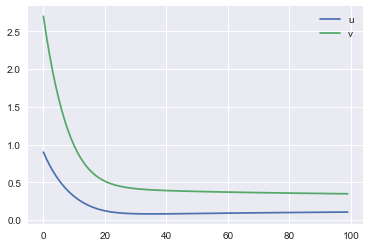

In [29]:
ulst, vlst = simulate_u_v_exp(1, 3, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=100, dt=10)
plt.plot(ulst, label='u')
plt.plot(vlst, label='v')
plt.legend()

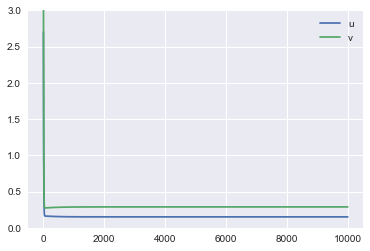

In [60]:
ulst, vlst = simulate_u_v_exp(3, 4, c1=6, c2=6, c3=6, theta=0,
                              tau=100, niter=10000, dt=10)
plt.plot(ulst[:10000], label='u')
plt.plot(vlst[:10000], label='v')
plt.ylim(0,3)
plt.legend()

In [61]:
print(vlst[-1], ulst[-1])

0.288209973824 0.150682278432


In [ ]:
u_lst = []
v_lst = []
theta = 0.6
u = u_init
v = v_init
for i in range(niter):
    u = update_u(u, v, c1, c2, tau, dt)
    u_lst.append(u)
    v = update_v(u, v, c1, c2, tau, dt)
    v_lst.append(v)
